<h1> <center> Job Posting Analysis :Data Scientist Vs Software engineer from Cybercoder <center>
</h1>

<p>
&emsp;&emsp; Nowadays, the data science field is hot, and it is unlikely that this will change in the near future. While a data driven approach is finding its way into all facets of business, companies are fiercely fighting for the best data analytic skills that are available in the market, and salaries for data science roles are going in overdrive. Compare with the commonly popular IT related job position, such as software engineer, most of big companies’ increased focus on acquiring data science talent goes hand in hand with the creation of a whole new set of data science roles and titles. 
</p>

<p>&emsp;&emsp;On the other hand, we are all graduating this spring with the degree of statistics. So we are interested in the job placement for the statistic degree. As we discussed above, the data scientists and analysts are really popular in the job market. We wonder the difference of data scientist and software engineers in term of location, salary, skill sets, experience, degree preference. So we want to find a online employment search website to gather the in-time information and data to figure out this problem. 
</p>

<p>&emsp;&emsp; <a href="https://www.cybercoders.com/">CyberCoders</a> is one of the innovative employment search website in the state. The version of cybercoder’s website is really clear and formatted. Since their posts have no outside links like other employment search websites, we are easier to get the content of each post to construct a data frame. Also, this website focuses more on the IT related job markets, so it is perfect for us to analyze content. Additionally, this website is well organized and frequently update since we found the most of job are posted within 10 days.  
</p>

<p> &emsp;&emsp;**The web crawler is <a href="https://github.com/MadScientistKris/Cybercoders-Scraping/blob/master/Project_edited.ipynb">here</a>.**
</p>

<p> &emsp;&emsp;In our project, we get the information of 109 Data Scientist and 200 Software Engineer job postings on CyberCoders through web scraping, which includes the job title, id, description, post data, salary range, preferred skills, city, and state. We compare the salary of DS and SDE, also including the comparison among different part of US. What is more, we find the need of years of experience through regular expression, the most important skills through NLP techniques. The degree required for the job and the posting dates are also topics we are interested in.
</p>

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import pandas as pd
import nltk
import string
import unicodedata
from collections import Counter
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import os,re
from collections import Counter
from datetime import datetime,date
import seaborn as sns
import folium
from IPython.display import HTML
from IPython.display import IFrame
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import compress
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [3]:
ds = pd.read_csv('data scientist.csv',index_col=False)
del ds['Unnamed: 0']

<h3><center>Posting Dates<center><h3/>


In [4]:
print Counter(ds['post_date'])

Counter({'03/04/2017': 72, '02/23/2017': 21, '02/28/2017': 3, '03/03/2017': 2, '03/01/2017': 2, '02/17/2017': 1, '01/04/2017': 1, '01/17/2017': 1, '02/02/2017': 1, '02/03/2017': 1, '12/14/2016': 1, '01/09/2017': 1, '02/20/2017': 1, '01/30/2017': 1})


<p> &emsp;&emsp; We get these data on Mar 4th 2017, and we want to know the posting date of these jobs. Here, you can find a interesting thing. The post dates are not uniformly distributed, and most of jobs are posted on 3/4/2017 and 2/23/2017. If you open the CyberCoders web now(3/5/2017), you can find a lot of jobs, whose job id is same as the ones of yesterday, are marked as 'Posting Today'.</p>

In [5]:
datevalues = Counter(ds['post_date'])
datevalues = [datetime.strptime(i,'%m/%d/%Y') for i in datevalues]
[datetime(2017,3,4)-i for i in datevalues]

[datetime.timedelta(15),
 datetime.timedelta(1),
 datetime.timedelta(59),
 datetime.timedelta(46),
 datetime.timedelta(30),
 datetime.timedelta(29),
 datetime.timedelta(80),
 datetime.timedelta(54),
 datetime.timedelta(12),
 datetime.timedelta(9),
 datetime.timedelta(33),
 datetime.timedelta(3),
 datetime.timedelta(0),
 datetime.timedelta(4)]

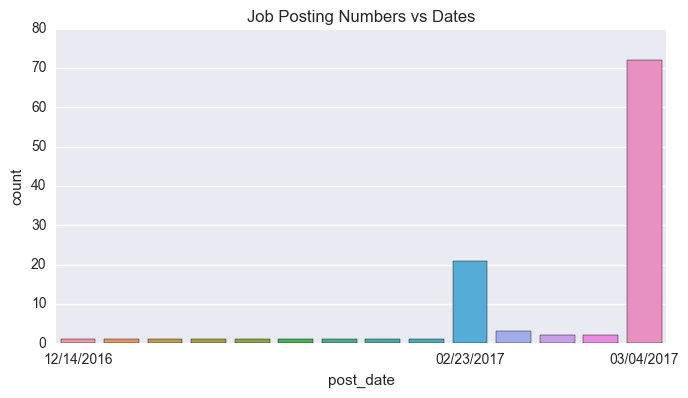

In [6]:
ds['post_date'] = pd.to_datetime(ds['post_date'])
plot = sns.factorplot('post_date',kind = 'count',data = ds,size=4, aspect=2)
plot.set(xticklabels=['12/14/2016','','','','','','','','','02/23/2017','','','','03/04/2017'])
plt.title('Job Posting Numbers vs Dates')
plt.show()

<p> &emsp;&emsp; The oldest job is posted on 12/14/2016, 80 days ago. However, most jobs are posted in recent 10 days.</p>

<h3><center>**Location**<center><h3/>

In [16]:
geolocator = Nominatim()
loc = geolocator.geocode("New York, NY")
loc
ds['location'] = ds['city']+','+ds['state']
lonlat = [geolocator.geocode(i) for i in ds.location]
lonlat[2]
print Counter(ds['state'])

Counter({'CA': 51, 'NY': 14, 'WA': 12, 'MA': 8, 'MD': 4, 'DC': 3, 'OH': 2, 'VA': 2, 'IL': 2, 'CT': 2, 'TX': 1, 'CO': 1, 'PA': 1, 'SC': 1, 'MO': 1, 'KY': 1, 'AZ': 1, 'FL': 1, 'OR': 1})


We transform the text to the real GPS data. Above location GPS data is the one example of how we get.  And we can see the count of the number of job post of each state. 

In [17]:
mapds = folium.Map(location=[39,-98.35], zoom_start=4)
marker_cluster = folium.MarkerCluster("Data Scientist Job").add_to(mapds)
for each in lonlat:
    folium.Marker(each[1]).add_to(marker_cluster)
    folium.MarkerCluster()
mapds.save('map.html')
IFrame('map.html', width=800, height=500)

<h3><center>Salary<center><h3/>


In [18]:
sum(pd.isnull(ds['salary_lower']))
ds2 = ds[pd.notnull(ds['salary_lower'])].copy()

ds2 = ds2[ds2.salary_lower>0]
#Only 74 records now
ds2['salary_mid']=(ds.salary_lower+ds.salary_upper)/2
print Counter(ds2.state)

Counter({'CA': 36, 'NY': 12, 'MA': 7, 'WA': 4, 'MD': 2, 'IL': 2, 'CT': 2, 'TX': 1, 'OH': 1, 'CO': 1, 'VA': 1, 'PA': 1, 'SC': 1, 'MO': 1, 'AZ': 1, 'OR': 1})


In the 109 data scientist posts we got from the cybercoder, there are 31 post without specific salary range, which denotes as unspecified. Also, there are 74 posts with positive salary range.

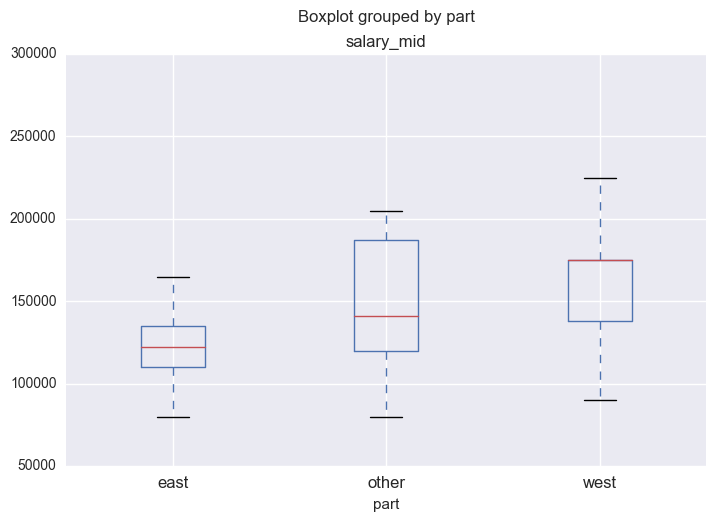

In [19]:
d={}
d['east']=['CT','MA','MD','NY','PA','SC','VA','ME','VT','NH','RI','NJ','DE','WV','NC','GA','AL']
d['west']=['CA','OR','WA','AK','MO','ID','MT','NV','UT','WY']
d['other']=['AZ','CO','IL','OH','TX']

ds2['part']=''

index = [i in d['east'] for i in ds2.state]
index2 = [i in d['west'] for i in ds2.state]
index3 = [i in d['other'] for i in ds2.state]
ds2.loc[index,'part']='east'
ds2.loc[index2,'part']='west'
ds2.loc[index3,'part']='other'

Counter(ds2.part)

ds2.boxplot("salary_mid", "part")
plt.show()



The above box plot shows that the west coast has the highest salary median among the whole state. The result makes sense since California have the Silicon Valley which aggregates a crowd of the most professional data scientist compared with other place. Also, we fit the linear regression model for the salary median and the states. 

In [71]:
mod = ols('salary_mid ~ part',
                data=ds2).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table


                sum_sq    df         F    PR(>F)
part      1.344950e+10   2.0  5.202564  0.007756
Residual  9.306600e+10  72.0       NaN       NaN


<center>** What's the situation of the software development engineer?**

In [20]:
sde = pd.read_csv('Software_Engineer.csv',index_col=False)
del sde['Unnamed: 0']

sde2 = sde[pd.notnull(sde['salary_lower'])].copy()

sde2 = sde2[sde2.salary_lower>0]

print len(sde)
print len(sde2)

200
157


<p> There are 200 job posts of software development engineers in the website and just 157 posts with a positive salary range.

In [21]:
sde2['salary_mid']=(sde2.salary_lower+sde2.salary_upper)/2
Counter(sde2.state)
sde2['part']='other'
index = [i in d['east'] for i in sde2.state]
index2 = [i in d['west'] for i in sde2.state]
sde2.loc[index,'part']='east'
sde2.loc[index2,'part']='west'
ds2['type']='Data Scientist'
sde2['type']='Software Engineer'
dssde = ds2.append(sde2)
dssde.head()

,city,job_id,location,need_for_position,part,post_date,preferred_skill,salary_lower,salary_mid,salary_upper,state,type
0,Newton,BA-1277535,"Newton,MA","- BS (min GPA 3.5) or MS or PhD in science, en...",east,02/23/2017,"Data Analytics, Informatics, Life Sciences . P...",100000.0,115000.0,130000.0,MA,Data Scientist
1,Sunnyvale,BF1-1327877,"Sunnyvale,CA",- Networking/Security - Experience with big d...,west,02/23/2017,"Python, C/C++, Networking, Security, Apache Sp...",150000.0,175000.0,200000.0,CA,Data Scientist
3,Redwood City,AW2-1341356,"Redwood City,CA",Requirements: Bachelors in Computer Science or...,west,02/23/2017,"Machine Learning, Python, R, Mapreduce, Javasc...",140000.0,182500.0,225000.0,CA,Data Scientist
4,Portland,CS9-1346787,"Portland,OR",Experience and knowledge of: - Machine Learnin...,west,02/23/2017,"Machine Learning, Data Mining, Python, ETL BI,...",100000.0,110000.0,120000.0,OR,Data Scientist
5,Needham,PD2-1346845,"Needham,MA",- BS with a focus on life sciences. A degree i...,east,02/23/2017,"Data Analytics, Life Sciences, Pharmaceuticals...",100000.0,115000.0,130000.0,MA,Data Scientist


<p> We use the same method on SDE that we apply into the data scientist. Then the above dataframe is the combination of the data scientist and SDE.</p>

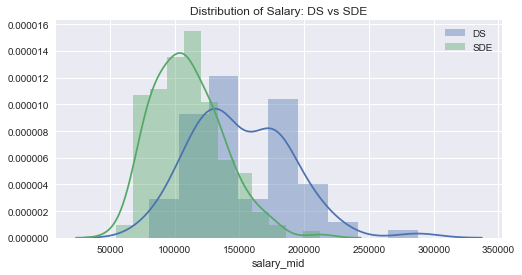

In [74]:
sns.set(rc={"figure.figsize": (8, 4)})
sns.distplot(dssde.salary_mid[dssde['type']=='Data Scientist'],hist_kws={"label":'DS'})
sns.distplot(dssde.salary_mid[dssde['type']=='Software Engineer'],hist_kws={"label":'SDE'})
plt.title('Distribution of Salary: DS vs SDE')
plt.legend()
plt.show()

The above plot shows the distribution of salary between data scientist and SDE. Actually, the  salary median of SDE is higher than data scientist. 

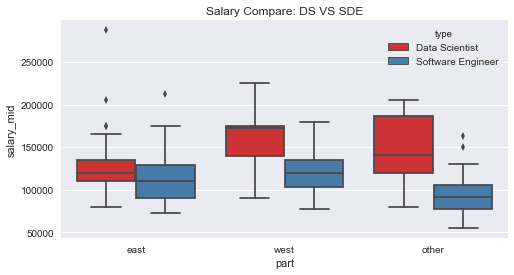

                sum_sq     df          F        PR(>F)
part      2.344070e+10    2.0  13.568313  2.706902e-06
type      5.785471e+10    1.0  66.976735  1.936368e-14
Residual  1.969471e+11  228.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:             salary_mid   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     41.75
Date:                Sat, 18 Mar 2017   Prob (F-statistic):           1.53e-21
Time:                        17:26:08   Log-Likelihood:                -2714.1
No. Observations:                 232   AIC:                             5436.
Df Residuals:                     228   BIC:                             5450.
Df Model:                           3                                         
Covariance Type:            nonrobust                                

In [75]:
sns.boxplot(x="part", y="salary_mid", hue="type", data=dssde,palette="Set1")
plt.title('Salary Compare: DS VS SDE')
plt.show()

mod2 = ols('salary_mid ~ part+type',
                data=dssde).fit()
                
aov_table2 = sm.stats.anova_lm(mod2, typ=2)
print aov_table2

print mod2.summary()

<p> From the location view, we can see that two types of job in the west coast are still higher than other place and the salary of SDE is still higher than Data Scientist.

<h3><center>Experience<center></h3>

<p>We want to know how many of the job postings specify the exact number of years of experience. We use regular expression to get this kind of info.<p>


In [22]:
ds.need_for_position = [i.lower() for i in ds.need_for_position] 
yoe= [re.findall(r'[0-9\-\\+0-9]+ years of ',i) for i in ds.need_for_position]
yoe[:5]
len(ds.need_for_position)- sum(i==[] for i in yoe)

49

<p>Among the 109 jobs, 49 of them specify the years of experience.</p>

In [24]:
yoe2 = list(compress(yoe, [i!=[] for i in yoe]))
del yoe2[8]
del yoe2[17]
yoe3 = [int(i[0][0]) for i in yoe2]
Counter(yoe3)

Counter({1: 2, 2: 4, 3: 26, 4: 1, 5: 13, 8: 1})

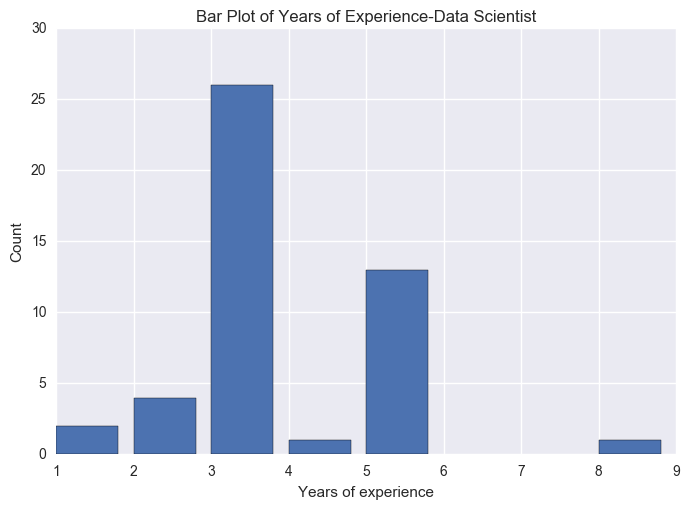

In [25]:
plt.bar(Counter(yoe3).keys(),Counter(yoe3).values())
plt.xlabel('Years of experience')
plt.ylabel('Count')
plt.title('Bar Plot of Years of Experience-Data Scientist')
plt.show()

<p> From the pie plot, we know that most of the job required 3 years experience before you apply for the job. This also denotes that the hard situation of finding the job in today's IT related job market. 

<h3><center>Skill Set<center></h3>


In [79]:
ds_skill =",".join( ds['preferred_skill'] ).lower()
ds_needForPosition ="".join( ds['need_for_position']).lower()
def tokenize(text):
    s = text.lower()
    s = re.sub(r'/|\(|\)', ',', s.lower()).split(',')
    s = [i.strip() for i in s if i != '']
    return s

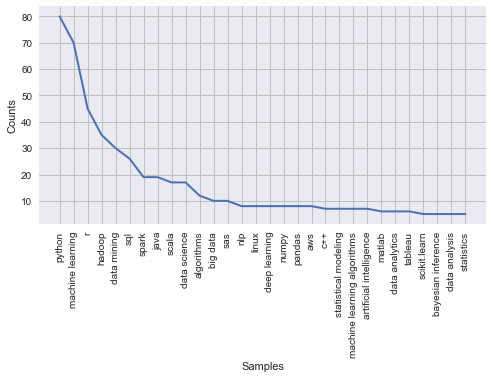

In [80]:
# skill set from prefered_skill ('sql' vs 'sql database', )
ds_filtered_skill = [word for word in tokenize(ds_skill) if word not in stopwords.words('english')] 
nltk.FreqDist(ds_filtered_skill).plot(30)

<p> From the above plot, we can see that the Python was the top one among the preferred skills, which means that STA 141 is a really useful class for us entering into the job market.</p>

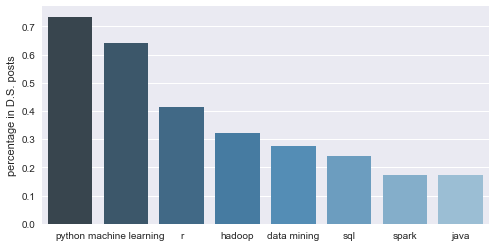

In [81]:
# Two sets of words with intersection
ds_skill_words = pd.DataFrame(nltk.FreqDist(ds_filtered_skill).most_common(8) )
ds_skill_words.iloc[:,1] = ds_skill_words.iloc[:,1] / ds.shape[0] 
ds_barplot = sns.barplot( x = 0, y = 1,data = ds_skill_words, palette = "Blues_d")
ds_barplot.set(xlabel = '', ylabel = 'percentage in D.S. posts')
plt.show()

In [82]:
print ds_filtered_skill
skill = ds_filtered_skill[:]
for n, i in enumerate(skill):
    if i == 'r':
        skill[n] = 'R+++'
print  skill

['data analytics', 'informatics', 'life sciences . pharmaceutical industry', 'java', 'python', 'python', 'c', 'c++', 'networking', 'security', 'apache spark', 'kafka', 'elasticsearch', 'mongodb', 'big data', 'predictive modeling', 'algorithm development', 'data mining', 'random forest', 'bayesian networks', 'bayesian modeling', 'markov chains', 'nosql databases', 'sql databases', 'machine learning', 'python', 'r', 'mapreduce', 'javascrip', 'spark', 'streaming', 'machine learning', 'data mining', 'python', 'etl bi', 'and data pipelines', 'r', 'hadoop', 'advanced statistical analysis', 'data analytics', 'life sciences', 'pharmaceuticals', 'java', 'python', 'informatics', 'big data', 'predictive modeling', 'algorithm development', 'data mining', 'random forest', 'bayesian networks', 'bayesian modeling', 'markov chains', 'nosql databases', 'sql databases', 'machine learning', 'python', 'linux', 'java', 'scala', 'r', 'spark', 'machine learning', 'python', 'linux', 'java', 'scala', 'r', 'spa

Here are all the results of filted preferred skills. 

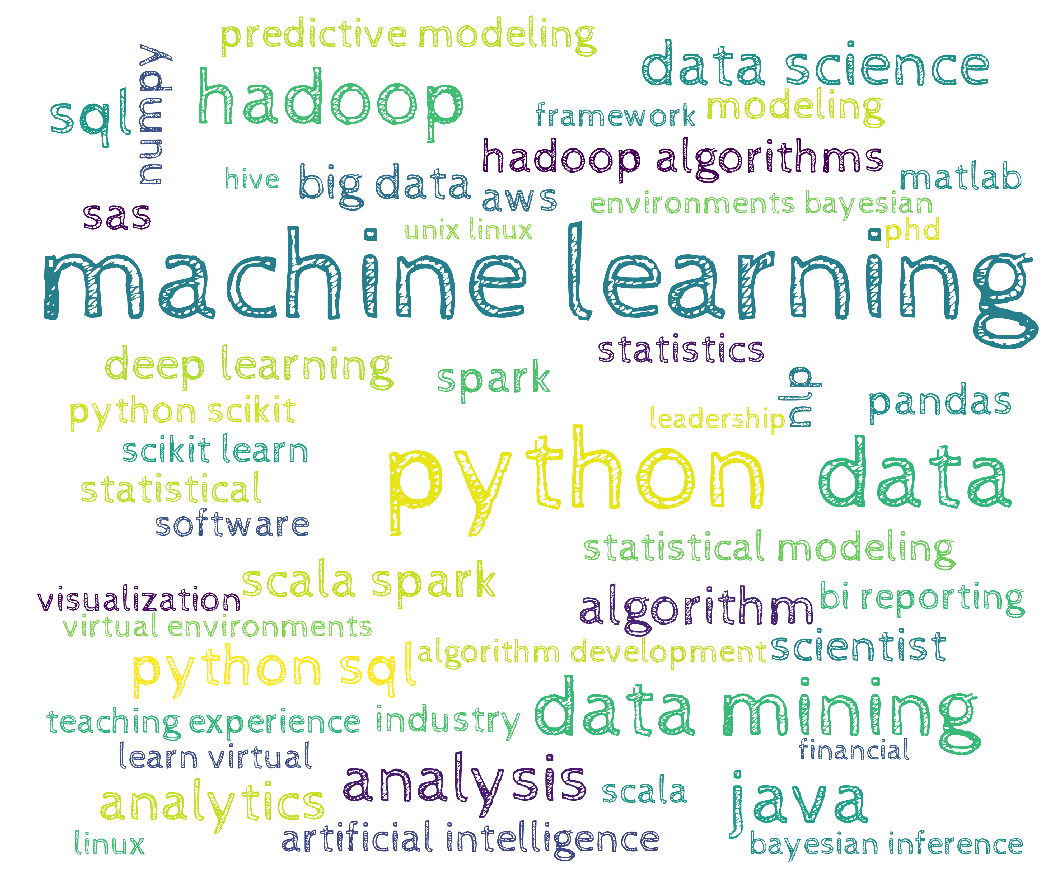

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_words=50,background_color = 'white', width = 2800,height = 2400, max_font_size = 1000, font_path = "/Users/shishengjie/Desktop/cabin-sketch/CabinSketch-Regular.ttf").generate(','.join(skill))
plt.figure(figsize=(18,16))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

The above picture is data sciencetist wordcloud. There is a bug here for the wordcloud. Compared with the bar plot we generate for the preferred skill, we can see the skill **"R"** is one of the three preferred skills. But we cannot find **"R"** in the wordcloud picture. This problem also shown in the later SDE analysis. We guess the reason is that the algorithm of the wordcloud will igonre the single letter, such as **"R","C","C++"**.

Since we have the **"need for the position"** column in the dataset. We wonder the difference between the **"need for the position"** and **preferred skill**.

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  from ipykernel import kernelapp as app


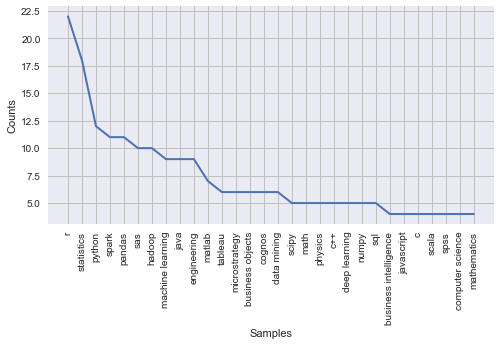

In [85]:
# skill from need_for_position
ds_filtered_needForPosition = [word for word in tokenize(ds_needForPosition) if word not in stopwords.words('english') and word not in ['etc.','e.g.']] 
nltk.FreqDist(ds_filtered_needForPosition).plot(30)

In [86]:
# experience required (not excluding empty entry)
ds_needForPosition_list = list(ds['need_for_position'])
ds_needForPosition_list_lower = list(ds['need_for_position'].str.lower()) # all lower case
len([i for i in ds_needForPosition_list_lower if 'experi' in i]) / float(len(ds_needForPosition_list_lower))

0.8532110091743119

Almost 86% of the job posts required the applicants have the previous related experience in the industry. 

<center>** What's the situation of the software development engineer?**

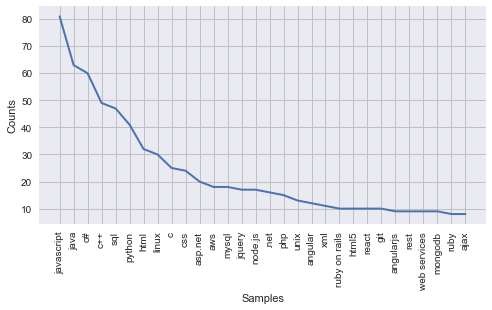

In [87]:
sde = pd.read_csv('Software_Engineer.csv', index_col=False)
del sde['Unnamed: 0']
sde_skill =",".join( sde['preferred_skill'] ).lower()
sde_filtered_skill = [word for word in tokenize(sde_skill) if word not in stopwords.words('english')] 
nltk.FreqDist(sde_filtered_skill).plot(30)

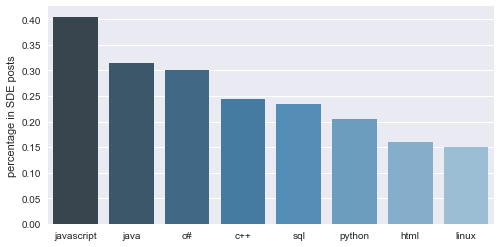

In [89]:
# Two sets of words with intersection
sde_skill_words = pd.DataFrame(nltk.FreqDist(sde_filtered_skill).most_common(8) )
sde_skill_words.iloc[:,1] = sde_skill_words.iloc[:,1] / sde.shape[0] 
sde_barplot = sns.barplot( x = 0, y = 1,data = sde_skill_words, palette = 'Blues_d')
sde_barplot.set(xlabel = '', ylabel = 'percentage in SDE posts')
plt.show()

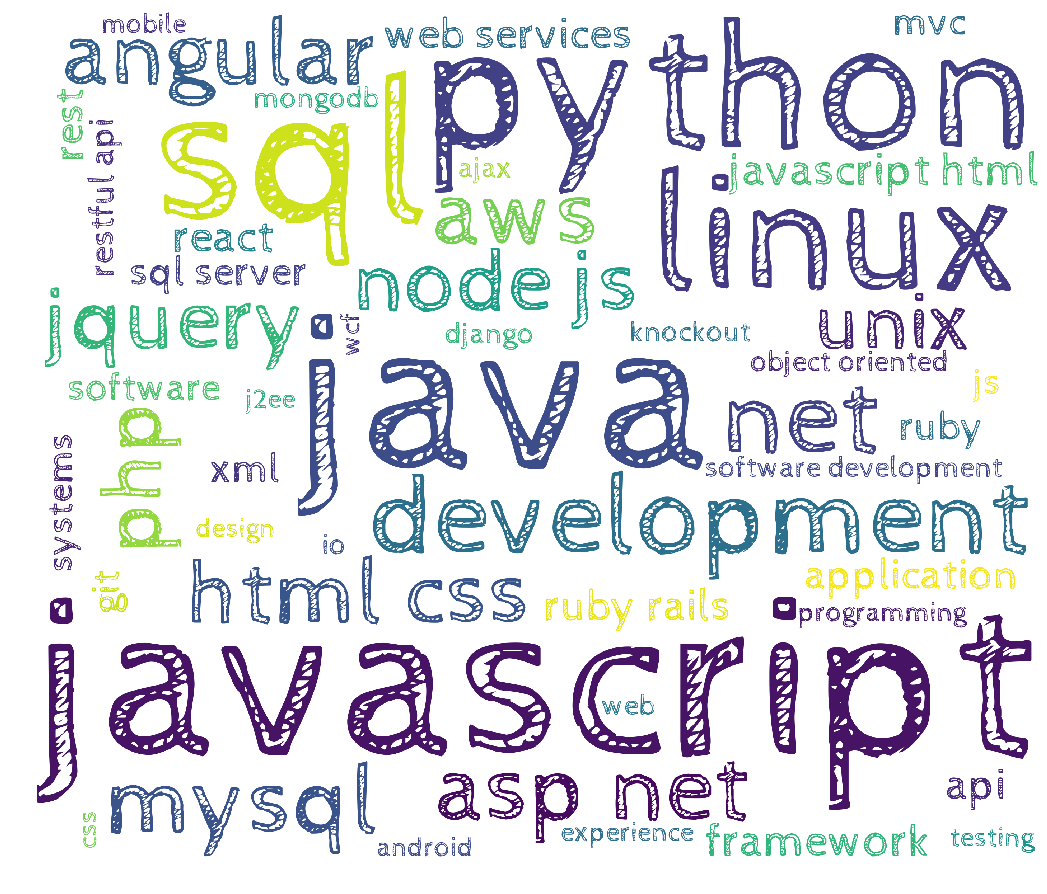

In [88]:
wordcloud = WordCloud(max_words=50,background_color = 'white', width = 2800,height = 2400, max_font_size = 1000, font_path="/Users/shishengjie/Desktop/cabin-sketch/CabinSketch-Regular.ttf").generate(','.join(sde_filtered_skill))
plt.figure(figsize=(18,16))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<h3><center>Degree<center></h3>


0 0 46
('statist', 45)
('math', 32)
('computer science', 25)
('engineer', 21)
('biolog', 5)
('econ', 1)
('physics', 10)
('chemis', 2)
('bioinformati', 4)
('life science', 5)


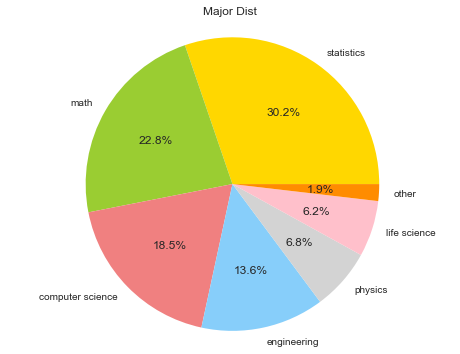

In [90]:
# degree_requirement

degree_level = ['Master', ' MS','M.S','Ph.D','PhD', 'BS','Bachelor']
degree_field = ['statist','math','computer science','engineer','biolog', 'econ','physics','chemis', 'bioinformati', 'life science']
# 'cs' contained in 'analytics', 'physics', 
bachelor_total = 0; master_total = 0; phd_total = 0;
for i in ds['need_for_position']:
    master_total = master_total + sum( (x in i) for x in ['Master', 'MS','M.S'] ) # 'algorithms', 'systems','platforms'
    bachelor_total = bachelor_total + sum((x in i) for x in ['BS', 'Bachelor'])
    phd_total = phd_total + sum( (x in i) for x in ['PhD', 'Ph.D','phd','ph.d'])
print bachelor_total, master_total, phd_total

for k in degree_field:
    a = sum( k in x for x in ds_needForPosition_list_lower)
    print (k, a)
field = [['statistics', 'math','computer science', 'engineering', 'physics','life science','other'], [49, 37, 30, 22, 11, 10, 3]]
plt.figure(figsize=(8,6))
plt.pie(field[1], labels = field[0], autopct='%1.1f%%',colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightgrey','pink','darkorange'])
plt.axis('equal')
plt.title('Major Dist')
plt.show()

The pie chart denotes that **Statistics, Math, Computer Science** are top three popular degrees that companies are welcome to hire no matter in the Data Science or SDE. 

In [91]:
# degree_requirement

degree_level = ['Master', ' MS','M.S','Ph.D','PhD', 'BS','Bachelor']
degree_field = ['statist','math','computer science','engineer','biolog', 'econ','physics','chemis', 'bioinformati', 'life science']
# 'cs' contained in 'analytics', 'physics', 
bachelor_total1 = 0; master_total2 = 0; phd_total3 = 0; a = 0;

count = 0 
np.array([sum((k in i) for k in ['Master', 'MS','M.S']) for i in sde['need_for_position'] if not pd.isnull(i)]).sum()

33

Also, there are 33 job posts specificly denoted that they like or preferred the master degree.  

In conclusion, according to the Cybercoder data, we get the most of employment information of Data Scientist and Software Develpment Engineer. Even though the current salary median of DS is lower than SDE, DS is a real potential job position for our statistic major students. Equited with some program languages like **"Python", "C"** and our professional statistical analysis experience, we believe that we can be really competitve in the job market. 